In [2]:
import numpy as np
from scipy import fftpack
from scipy import optimize
from matplotlib import pyplot as plt
from lens_simulation import Lens, Simulation

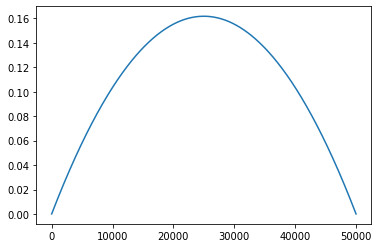

In [19]:
amplitude = 10000
sim_width = .5e-3
pixel_size = 0.01e-6 
n_slices = 1000

lens = Lens.Lens(
    diameter=sim_width,
    height=0.1617600002225519,#3e-6, # calculated for f of 60
    exponent=2.,
    medium=Lens.Medium(2.348)
)

lens.generate_profile(pixel_size=pixel_size)
plt.plot(lens.profile)
plt.show()

In [20]:
A = 10000
# start with n=1 to match herschels paper
# output medium
output_medium = Lens.Medium(1.)
sim_wavelength = 488e-9
step_size = 1.e-6


equivalent_focal_distance = Simulation.calculate_equivalent_focal_distance(lens, output_medium)
print(equivalent_focal_distance)

0.060000143396672014


In [21]:
frequency_array = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)

print(len(frequency_array))

delta_1 = (lens.medium.refractive_index-output_medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)
wavefront_1 = A * np.exp(1j * phase_1)
wavefront_1 = fftpack.fft(wavefront_1)

start_distance_1 = 0.95 * equivalent_focal_distance
finish_distance_1 = 1 * equivalent_focal_distance

n_slices_1 = 10000

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * output_medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array) / output_medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)
from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
# plt.imshow(sim_1)
plt.show()

passed_wavefront = propagation


50001


MemoryError: Unable to allocate 3.73 GiB for an array with shape (10000, 50000) and data type float64

<Figure size 432x288 with 2 Axes>